In [1]:
import os
#import argparse

import numpy as np
from numpy.random import normal

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from progressbar import ProgressBar

In [2]:
"""
parser = argparse.ArgumentParser(description='generater')
parser.add_argument('--out', '-o', default='data01',
                    help='Directory to output the numpy data')
parser.add_argument('--num', '-n', type=int, default=20,
                    help='Number of numpy data to generate')
args = parser.parse_args()
"""
dirname = 'data01' # output dir name
n = 2000 # Number of data to generate

In [3]:
X = 21 # length of x
Y = 21 # length of y
Z = 21 # length of z

_x = np.arange(X)
_y = np.arange(Y)
_z = np.arange(Z)

# index of voxel
xx, yy, zz = np.meshgrid(_x, _y, _z)

In [4]:
def sphere_index(x, y, z, r):
    # return bool index. True if the index is inside the sphere
    # r: radius
    return (xx - x) ** 2 + (yy - y) ** 2 + (zz - z) ** 2 < r ** 2

In [5]:
def create_voxel():
    # new voxel
    voxel = np.zeros([X,Y,Z], dtype=float)
    
    # hidden parameters to create ball creature. 
    
    # Sphere with center (7, 7, 7), radius 4 with fluctuation
    x, y, z = np.random.normal(7,2,3)
    r = normal(4, 2)
    voxel[sphere_index(x,y,z,r)] = 5
    
    # Rectangular with center (14, 14, 14), radius 4 with fluctuation
    x, y, z = np.random.normal(14,2,3)
    r = normal(4, 2)
    voxel[sphere_index(x,y,z,r)] = 5
    
    return voxel

In [6]:
# mkdir
if not os.path.isdir(dirname):
    os.makedirs(dirname)

# Generate and save dummy ct data
for i in range(n):
    voxel = create_voxel()
    # add new dim (21, 21, 21) => (1, 21, 21, 21). CT data is grayscale => 1ch 
    voxel = np.expand_dims(voxel, axis=0) 
    np.save("data01/ct"+"%04.f"%(i), voxel)

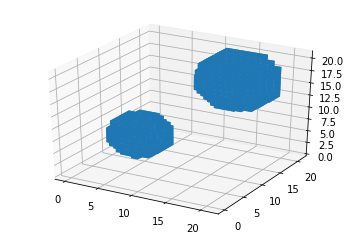

In [7]:
# Visualize last voxel data with matplotlib
fig = plt.figure()
ax = fig.gca(projection='3d')
v = np.squeeze(voxel,axis=0) # reshape (1, 21, 21, 21) => (21, 21, 21)
ax.voxels(v)
plt.show()